Linear Regression in Python

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

In [35]:
# Set random seed for reproducibility
np.random.seed(42)
num_samples = 100

# Generate random features (X)
X = np.random.rand(num_samples, 1)  

# Generate random target variable (y) with a linear relationship
# Assuming y = 3X + 2 + noise
noise = np.random.normal(loc=0, scale=0.3, size=(num_samples, 1))  # Adding some Gaussian noise

y_hom = 3*X + 2 + noise  # Using a homoscedastic model

y_het = 3 * X + 2 + 3 * X * noise # Using heteroscedastic model


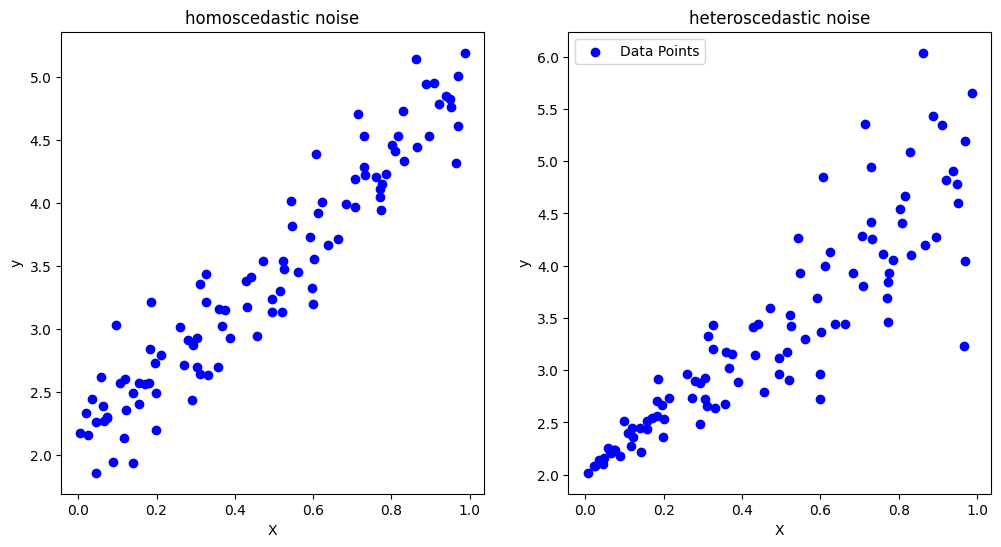

In [36]:
## Plotting this data set
import matplotlib.pyplot as plt



plt.figure(figsize=(12, 6))

plt.subplot (1,2,1)
plt.scatter(X, y_hom, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('homoscedastic noise')
plt.legend()


plt.subplot (1,2,2)
plt.scatter(X, y_het, color='blue', label='Data Points')
plt.xlabel('X')
plt.ylabel('y')
plt.title('heteroscedastic noise')
plt.legend()



plt.show()

In [37]:
# Fit linear regression model
model_hom = LinearRegression()
model_hom.fit(X,y_hom)

model_het = LinearRegression()
model_het.fit(X,y_het)

# predict y values using the fitted linear model
y_hom_pred = model_hom.predict(X)
y_het_pred = model_het.predict(X)


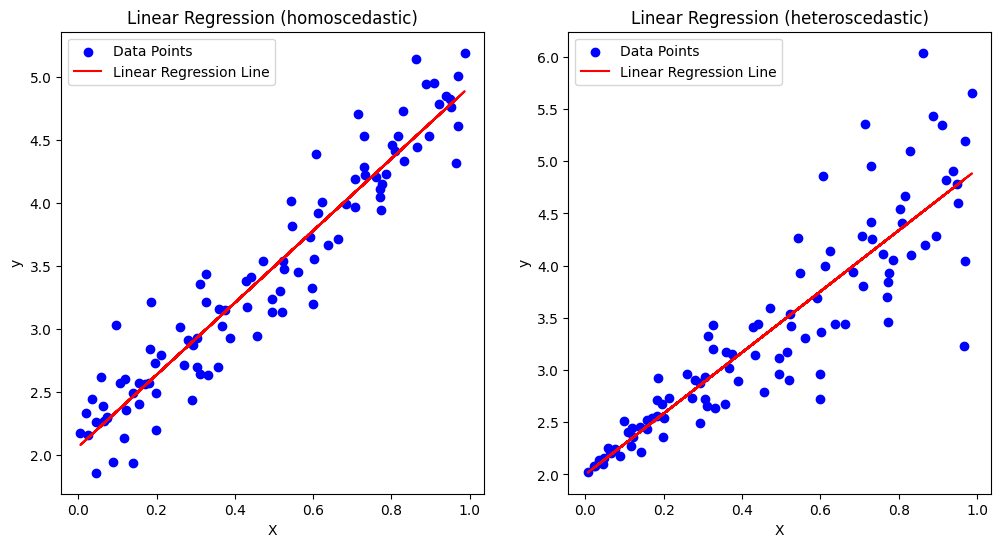

In [40]:
# Plot the regression line

import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1,2,1)
plt.scatter(X, y_hom, color='blue', label='Data Points')
plt.plot(X, y_hom_pred, color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression (homoscedastic)')
plt.legend()


plt.subplot(1,2,2)
plt.scatter(X, y_het, color='blue', label='Data Points')
plt.plot(X, y_het_pred, color='red', label='Linear Regression Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression (heteroscedastic)')
plt.legend()



plt.show()

To evalute the model, we have to use the statsmodel module

In [46]:
import statsmodels.api as sm

# Add constant to X for intercept term
X_with_intercept = sm.add_constant(X)

# Fit the linear regression model
model_hom = sm.OLS(y_hom, X_with_intercept)
results_hom = model_hom.fit()

model_het = sm.OLS(y_het, X_with_intercept)
results_het = model_het.fit()

# Print summary of the regression results
print(results_hom.summary())
print(results_het.summary())

# Compute t-scores and p-values for the coefficients
t_scores_hom = results_hom.tvalues
p_values_hom = results_hom.pvalues

t_scores_het = results_het.tvalues
p_values_het = results_het.pvalues

# Print t-scores and p-values
print("\nT-scores (homoscedastic):")
print(t_scores_hom)
print("\nT-scores (heteroscedastic):")
print(t_scores_het)

print("\nP-values (homoscedastic):")
print(p_values_hom)
print("\nP-values (heteroscedastic):")
print(p_values_het)

# Compute confidence intervals for the coefficients (95% confidence)
conf_ints_hom = results_hom.conf_int(alpha=0.05)
conf_ints_het = results_het.conf_int(alpha=0.05)

# Print confidence intervals
print("\nConfidence Intervals (95%) for Homoscedastic noise:")
print(conf_ints_hom)
print("\nConfidence Intervals (95%) for Homoscedastic noise:")
print(conf_ints_het)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.908
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     968.9
Date:                Wed, 14 Feb 2024   Prob (F-statistic):           1.31e-52
Time:                        09:35:37   Log-Likelihood:                -10.749
No. Observations:                 100   AIC:                             25.50
Df Residuals:                      98   BIC:                             30.71
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0645      0.051     40.413      0.0